In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_excel('dashboard.xlsx')
dataset.head()

,Country,State,Time_Period,Outcome,Date
0,US,PA,10h00-11h00,Failure,2021-04-01
1,US,MS,9h00-10h00,Success,2021-04-01
2,US,TX,9h00-10h00,Success,2021-04-01
3,US,NJ,10h00-11h00,Success,2021-04-01
4,US,NM,9h00-10h00,Success,2021-04-01


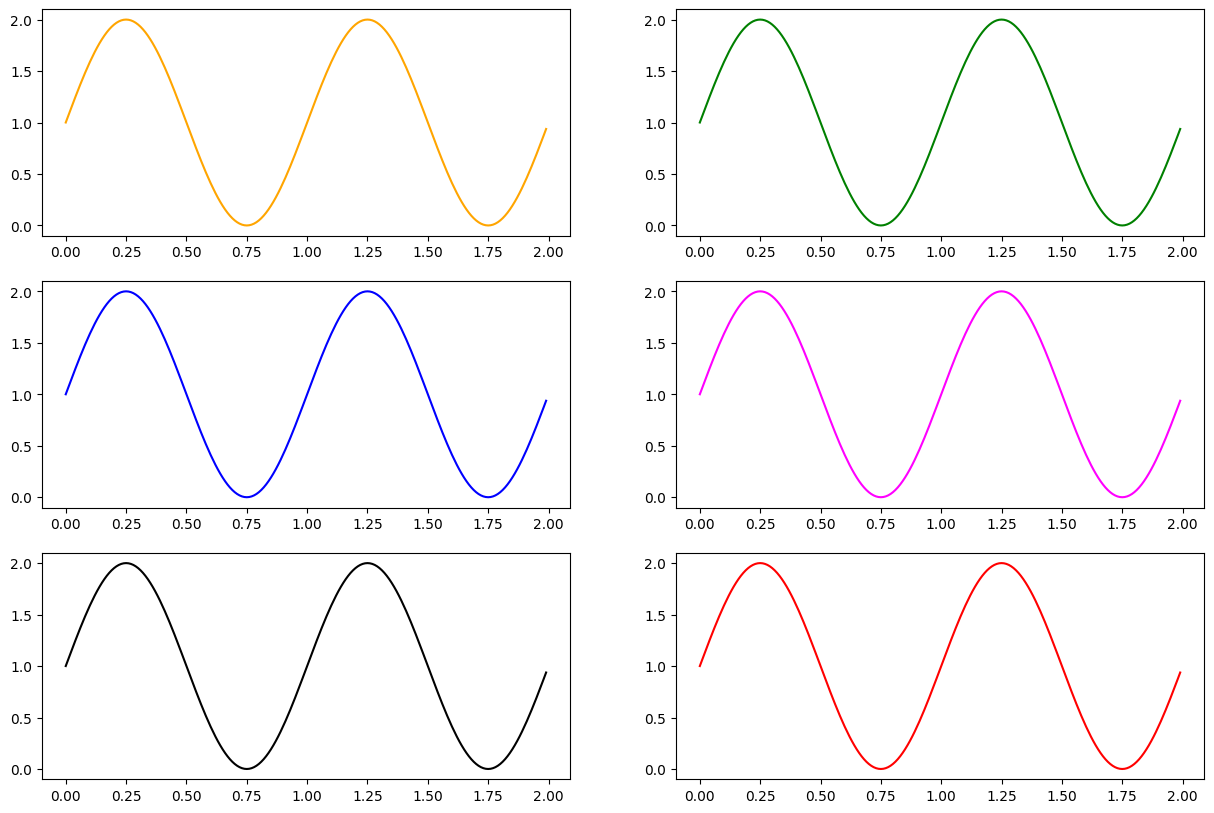

In [9]:
def success(outcome):
    if outcome == "Success":
        return 1
    else:
        return 0
def failure(outcome):
    if outcome == "Failure":
        return 1
    else:
        return 0


dataset["Success"] = dataset.Outcome.apply(success)
dataset["Failure"] = dataset.Outcome.apply(failure)


number_of_calls = dataset.groupby("Date")["Country"].count()
number_of_success_calls = dataset.groupby("Date")["Success"].sum()
number_of_failure_calls = dataset.groupby("Date")["Failure"].sum()

ratio_success_overall = number_of_success_calls / number_of_calls * 100

failed_success_timeout = dataset.groupby("Outcome")["Outcome"].count()

number_of_calls_by_state = dataset.groupby("State")["Success"].count()
number_of_calls_by_state_success = dataset.groupby("State")["Success"].sum()


number_of_calls_by_state_ratio = (number_of_calls_by_state_success / number_of_calls_by_state * 100).sort_values(ascending=False)

success_time_out = dataset[dataset["Success"] == 1].groupby("Time_Period")["Success"].count().sort_index()

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))
ax1.plot(number_of_success_calls.index, number_of_success_calls.values)
ax1.plot(number_of_failure_calls.index, number_of_failure_calls.values)

ax2.plot(x, y, color="green")
ax3.plot(x, y, color="blue")
ax4.plot(x, y, color="magenta")
ax5.plot(x, y, color="black")
ax6.plot(x, y, color="red")